# Root Finding Numerical Methods + Extra

## Root Finding

We are going to explore simple root finding techniques: the bracket method and newton's method

## Main Idea of Root Finding

The idea of root finding is to determine the solution to the solution $f(x)=0$ by using a variety of techinques. We will examine two different methods: Bracket Method and Newton's method

## Simple Idea of the Bracket Method
- Choose a bracket (a,b) such that the signs of f(a) and f(b) are different
- Then consider the point $\frac{a+b}{2}$, we calculate f($\frac{a+b}{2}$) and then determine the sign of that point. - If the sign is the same as f(b), replace b with with new point to form a new bracket (a,$\frac{a+b}{2}$); if the sign is the same as f(a), replace a with the new point to form a new bracket ($\frac{a+b}{2}$,b).
- Continue this process until the length of the bracket is smaller than a fixed tolerance.

## Simple Idea of Newton's Method

- Given f(x) and f'(x) we use a linear approximation to f(x) to determine the x intercept of the line to determine where f(x*)=0 is.

First form the equation of a line with our given points:

$$ y = f'(x_k)(x-x_k)+f(x_k)$$
Then we solve for y=0 to determine the x-intercept:

<center>
$\begin{align}
0 &= f'(x_k)(x-x_k)+f(x_k) \\
\frac{-f(x_k)}{f'(x_k)} &= (x-x_k) \\
x_k-\frac{f(x_k)}{f'(x_k)} &= x
\end{align}$
</center>

Therefore we have $x=x_k-\frac{f(x_k)}{f'(x_k)}$ as our next point so we can call this $x_{k+1}$ and we can continue this process until f(x) is less than a certain threshold.

## Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Example: Bracket Method

Let's consider the example of trying to find the root of a very simple equation $y=-2x+1$. Immediately we should see that a root of this would be $x=\frac{1}{2}$.

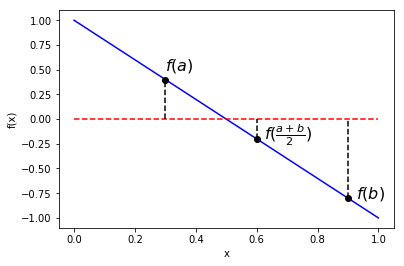

In [39]:
a = -2
b = 1
r = np.linspace(0,1,10)
f = lambda r, a, b: a*r+1

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, f(r, a, b), 'b')
axes.plot(r, np.zeros(r.shape),'r--')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))

c=0.3
d=0.9
axes.plot(c, f(c,a,b), 'ko')
axes.plot([c, c], [0.0, f(c, a, b)], 'k--')
axes.text(c, f(c,a,b)+0.1, "$f(a)$", fontsize=16)

axes.plot(d, f(d,a,b), 'ko')
axes.plot([d, d], [f(d, a, b), 0.0], 'k--')
axes.text(d+0.025, f(d,a,b), "$f(b)$", fontsize=16)

axes.plot((c+d)/2, f((c+d)/2,a,b), 'ko')
axes.plot([(c+d)/2, (c+d)/2], [f((c+d)/2, a, b), 0.0], 'k--')
axes.text((c+d)/2+0.025, f((c+d)/2,a,b), r"$f(\frac{a+b}{2})$", fontsize=16)

plt.show()

## Example: Newtons Method

Try to find the positive root of this equation: $y=-2x^2+1$

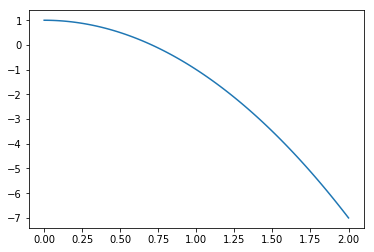

In [44]:
x = np.linspace(0,2,100)
plt.plot(x,f(x))

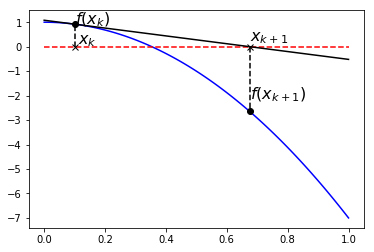

In [74]:
f = lambda x: -8*x*x+1
f_prime = lambda x: -16*x
x = np.linspace(0,1,100)
# Initial guess
x_k = 0.1

# Setup figure to plot convergence
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, f(x), 'b')
axes.plot(x, np.zeros(x.shape),'r--')

# Plot x_k point
axes.plot([x_k, x_k], [0.0, f(x_k)], 'k--')
axes.plot(x_k, f(x_k), 'ko')
axes.text(x_k+0.01,  0+0.1, "$x_k$", fontsize=16)
axes.plot(x_k, 0.0, 'xk')
axes.text(x_k, f(x_k), "$f(x_k)$", fontsize=16)
axes.plot(x, f_prime(x_k) * (x- x_k) + f(x_k), 'k')

# Plot x_{k+1} point
x_k = x_k - f(x_k) / f_prime(x_k)
axes.plot([x_k, x_k], [0.0, f(x_k)], 'k--')
axes.plot(x_k, f(x_k), 'ko')
axes.text(x_k, 0.25, "$x_{k+1}$", fontsize=16)
axes.plot(x_k, 0.0, 'xk')
axes.text(x_k, f(x_k)+0.5, "$f(x_{k+1})$", fontsize=16)

# axes.set_xlabel("r (%)")
# axes.set_ylabel("f(r)")
# axes.set_title("Newton-Raphson Steps")
# axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))

plt.show()

# Now try it yourself

In [ ]:
#Bracket Method to determine a Zero

# Lotka Volterra Equations

An interesting example to examine, often called the predator prey equations; models population

<center>
$\begin{align}
\frac{dx}{dt} &= \alpha x - \beta xy \\
\frac{dx}{dt} &= \delta xy - \gamma y \\
\end{align}$
</center>

Where we have x as the number of prey, y as the number of predators, the derivatives represent the instanteous growth rates of the two species. $\alpha, \beta, \delta, \gamma$ describes the interations between the species. 

It is also an example of a __Kolomorgov Model__.

<img src="images/wow.jpeg" width=700>

In [296]:
#Setting the Parameters
alpha = 0.89
beta = 1.3333
delta = 1
gamma = 1

In [297]:
#Lokta-Volterra Diff eqs
delta_x = lambda x,y: alpha*x-beta*x*y
delta_y = lambda x,y: delta*x*y-gamma*y

In [298]:
#Simulating the System
x=1.2
y=1.2

x_hist = []
y_hist = []
for i in range(100):
    x_hist.append(x)
    y_hist.append(y)
    x+=delta_x(x,y)
    y+=delta_y(x,y)
    if x<0:
        x=0
    if y<0:
        y=0

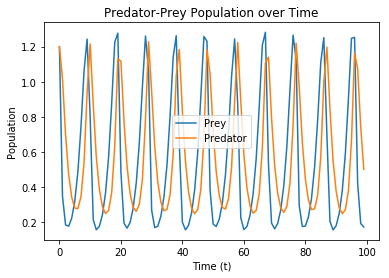

In [300]:
plt.plot(x_hist,label="Prey")
plt.plot(y_hist,label="Predator")
plt.title("Predator-Prey Population over Time")
plt.ylabel("Population")
plt.xlabel("Time (t)")
plt.legend()

Text(0.5,1,'Predator-Prey Population Phase Diagram')

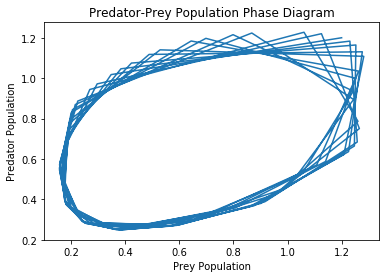

In [301]:
plt.plot(x_hist,y_hist)
plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.title("Predator-Prey Population Phase Diagram")

In [ ]:
#https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations